## This is the main file, all my steps, including training and visualization will be recorded in this file.

### 1. Creating venv and install necessary packages

In [4]:
! python -m venv venv

In [1]:
! pip install matplotlib

                                              0.0/8.0 MB ? eta -:--:--
     --                                       0.4/8.0 MB 12.5 MB/s eta 0:00:01
     ----                                     0.9/8.0 MB 11.0 MB/s eta 0:00:01
     -------                                  1.5/8.0 MB 11.6 MB/s eta 0:00:01
     ----------                               2.0/8.0 MB 11.8 MB/s eta 0:00:01
     ------------                             2.5/8.0 MB 11.6 MB/s eta 0:00:01
     ---------------                          3.1/8.0 MB 11.6 MB/s eta 0:00:01
     ------------------                       3.6/8.0 MB 11.6 MB/s eta 0:00:01
     ---------------------                    4.2/8.0 MB 11.7 MB/s eta 0:00:01
     -----------------------                  4.8/8.0 MB 11.7 MB/s eta 0:00:01
     --------------------------               5.4/8.0 MB 11.9 MB/s eta 0:00:01
     -----------------------------            5.9/8.0 MB 11.8 MB/s eta 0:00:01
     --------------------------------         6.5/8.0 MB 11.


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# install PyTorch with CUDA support
! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
                                              0.0/2.5 GB ? eta -:--:--
                                              0.0/2.5 GB 17.9 MB/s eta 0:02:21
                                              0.0/2.5 GB 15.6 MB/s eta 0:02:42
                                              0.0/2.5 GB 16.9 MB/s eta 0:02:29
                                              0.0/2.5 GB 18.2 MB/s eta 0:02:18
                                              0.0/2.5 GB 19.1 MB/s eta 0:02:12
                                              0.0/2.5 GB 18.9 MB/s eta 0:02:13
                                              0.0/2.5 GB 19.1 MB/s eta 0:02:11
                                              0.0/2.5 GB 18.9 MB/s eta 0:02:13
                                              0.0/2.5 GB 19.0 MB/s eta 0:02:12
                                              0.0/2.5 GB 19.1 MB/s eta 0:02:11
                                              0.0/2.5 GB 19.2 MB/s eta 0:02:11
 


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
! pip install pandas

                                              0.0/11.6 MB ? eta -:--:--
     -                                        0.4/11.6 MB 12.2 MB/s eta 0:00:01
     ----                                     1.2/11.6 MB 14.8 MB/s eta 0:00:01
     -------                                  2.1/11.6 MB 17.0 MB/s eta 0:00:01
     ----------                               3.0/11.6 MB 19.0 MB/s eta 0:00:01
     ------------                             3.7/11.6 MB 16.6 MB/s eta 0:00:01
     ---------------                          4.4/11.6 MB 16.6 MB/s eta 0:00:01
     ------------------                       5.3/11.6 MB 17.9 MB/s eta 0:00:01
     ---------------------                    6.2/11.6 MB 17.1 MB/s eta 0:00:01
     ------------------------                 7.0/11.6 MB 17.2 MB/s eta 0:00:01
     --------------------------               7.8/11.6 MB 17.1 MB/s eta 0:00:01
     -----------------------------            8.6/11.6 MB 17.1 MB/s eta 0:00:01
     -------------------------------          9.


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
! pip install huggingface
! pip install transformers

   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/10.1 MB 13.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.3/10.1 MB 14.9 MB/s eta 0:00:01
   -------------------------------------- - 9.7/10.1 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 15.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 17.0 MB/s eta 0:00:00


In [24]:
! python.exe -m pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


#### Adding venv/* to git ignore, as it containst too many files, it's difficult for Git to 

### 2. Examin the training Data

In [83]:
import torch, numpy as np, matplotlib.pyplot as plt, pandas as pd

In [84]:
# Skipping the first row of training data, as it is: Data derived from a public source,,,,,,,,,,,,,,,,,,,,,,
training_load = pd.read_csv('training_loan_data.csv', skiprows=1)

# show the head of the dataframe and examine the contents
pd.set_option('display.max_columns', None)  # there are 23 colums in total, and pd shows only 20 by default, we need to display all of them
display(training_load.head(5))

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,33.3,79.6,16.94,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


#### From the info shown, non number colums are: term, int_rate, emp_length, home_ownership, desc, purpose. Now examine them one by one.

##### 1. term, need to make sure if all the units are in month, if so, we can convert them in to numbers.

In [85]:
for i, term in enumerate(training_load['term']):
    try: assert(type(term) is str)
    except: print(i, term)

188123 nan
188124 nan
188125 nan
188126 nan
188127 nan
188128 nan
188129 nan
188130 nan
188131 nan
188132 nan
188133 nan
188134 nan
188135 nan
188136 nan
188137 nan
188138 nan
188139 nan
188140 nan
188141 nan
188142 nan
188143 nan
188144 nan
188145 nan
188146 nan
188147 nan
188148 nan
188149 nan
188150 nan
188151 nan
188152 nan
188153 nan
188154 nan
188155 nan
188156 nan
188157 nan
188158 nan
188159 nan
188160 nan
188161 nan
188162 nan
188163 nan
188164 nan
188165 nan
188166 nan
188167 nan
188168 nan
188169 nan
188170 nan
188171 nan
188172 nan
188173 nan
188174 nan
188175 nan
188176 nan
188177 nan
188178 nan
188179 nan
188180 nan
188181 nan
188182 nan
188183 nan
188184 nan
188185 nan
188186 nan
188187 nan
188188 nan
188189 nan
188190 nan
188191 nan
188192 nan
188193 nan
188194 nan
188195 nan
188196 nan
188197 nan
188198 nan
188199 nan
188200 nan
188201 nan
188202 nan
188203 nan
188204 nan
188205 nan
188206 nan
188207 nan
188208 nan
188209 nan
188210 nan
188211 nan
188212 nan
188213 nan

In [86]:
# as term contains nan type, we loop through them again
for i, term in enumerate(training_load['term']):
    try: assert(type(term) is str or np.nan)
    except: print(i, term)

In [87]:
# we confirmed that term contians only str and nan, we now examine the unit of the loan terms
for i, term in enumerate(training_load['term']):
    if type(term) is str:
        assert(term[-7:] == ' months')

In [88]:
# replace month term with month numbers, leave nan for now
training_load['term'] = training_load['term'].apply(lambda term: int(term[:-7]) if type(term) is str else term)
display(training_load.head(5))

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36.0,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36.0,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36.0,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36.0,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36.0,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,33.3,79.6,16.94,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


##### 2. int_rate

In [89]:
for i, int_rate in enumerate(training_load['int_rate']):
    try: assert(type(int_rate) == str)
    except: print(i, int_rate)

188123 nan
188124 nan
188125 nan
188126 nan
188127 nan
188128 nan
188129 nan
188130 nan
188131 nan
188132 nan
188133 nan
188134 nan
188135 nan
188136 nan
188137 nan
188138 nan
188139 nan
188140 nan
188141 nan
188142 nan
188143 nan
188144 nan
188145 nan
188146 nan
188147 nan
188148 nan
188149 nan
188150 nan
188151 nan
188152 nan
188153 nan
188154 nan
188155 nan
188156 nan
188157 nan
188158 nan
188159 nan
188160 nan
188161 nan
188162 nan
188163 nan
188164 nan
188165 nan
188166 nan
188167 nan
188168 nan
188169 nan
188170 nan
188171 nan
188172 nan
188173 nan
188174 nan
188175 nan
188176 nan
188177 nan
188178 nan
188179 nan
188180 nan
188181 nan
188182 nan
188183 nan
188184 nan
188185 nan
188186 nan
188187 nan
188188 nan
188189 nan
188190 nan
188191 nan
188192 nan
188193 nan
188194 nan
188195 nan
188196 nan
188197 nan
188198 nan
188199 nan
188200 nan
188201 nan
188202 nan
188203 nan
188204 nan
188205 nan
188206 nan
188207 nan
188208 nan
188209 nan
188210 nan
188211 nan
188212 nan
188213 nan

In [90]:
training_load['int_rate'] = training_load['int_rate'].apply(lambda int_rate: eval(int_rate[:-1]) if type(int_rate) is str else int_rate)

##### These are the same rows as in term column, might be data missing

In [91]:
display(training_load[188123:188143])

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
188123,10188124,NaN,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,196,NaN
188124,10188125,NaN,9600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,126,NaN
188125,10188126,NaN,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,105,NaN
188126,10188127,NaN,11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,144,NaN
188127,10188128,NaN,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,105,NaN
188128,10188129,NaN,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,196,NaN
188129,10188130,NaN,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,34,NaN
188130,10188131,NaN,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,105,NaN
188131,10188132,NaN,9600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,126,NaN
188132,10188133,NaN,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,131,NaN


In [92]:
# deleting all rows with NaN bad_flag
training_load.drop(training_load[training_load['bad_flag'].isna()].index, inplace=True)

#### 3. emp_length

In [110]:
print(training_load['emp_length'].value_counts())

emp_length
10+ years    61648
2 years      16257
5 years      14361
3 years      14058
< 1 year     13312
6 years      11981
1 year       11504
7 years      11287
4 years      10905
8 years       9040
9 years       7178
Name: count, dtype: int64


In [93]:
emp_length_mapping = {
    '10+ years': 10,
    '1 year': 1,
    '< 1 year': 0.5,
    np.nan: np.nan
}

training_load['emp_length'] = training_load['emp_length'].apply(lambda emp_length: emp_length_mapping[emp_length] if emp_length in emp_length_mapping else eval(emp_length[:-6]))

#### 4. home_ownership, this variable seems to be categories, we can convert them into integers

In [111]:
print(training_load['home_ownership'].value_counts())


home_ownership
MORTGAGE    97647
RENT        76149
OWN         15573
OTHER          46
NONE           42
Name: count, dtype: int64


In [95]:
# we can conlude np.Nan and "NONE" as the same
home_ownership_mapping = {
    'RENT': 1,
    'NONE': 2,
    'OTHER': 3,
    'MORTGAGE': 4,
    'OWN': 5,
    np.nan: 2
}
training_load['home_ownership'] = training_load['home_ownership'].apply(lambda home_ownership: home_ownership_mapping.get(home_ownership, home_ownership))
display(training_load.sample(5))



,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
187752,10187753,1299941.0,1750,36.0,7.90,NaN,1,14748.0,NaN,credit_card,NaN,NaN,23.27,0.0,NaN,63.60%,NaN,NaN,NaN,NaN,1,24,0.0
185759,10185760,1349079.0,12000,36.0,8.90,9.0,4,35000.0,Borrower added on 01/16/12 > Pay of Credit c...,debt_consolidation,NaN,NaN,9.02,0.0,NaN,57.80%,NaN,NaN,NaN,NaN,1,157,0.0
85599,10085600,7130794.0,15000,36.0,12.12,0.5,1,80000.0,Borrower added on 06/06/13 > I would like to...,debt_consolidation,25.0,41.1,14.34,2.0,3.0,34%,23100.0,NaN,23536.445630,28087.0,1,196,0.0
37732,10037733,9430394.0,15000,36.0,21.70,0.5,4,54000.0,NaN,credit_card,37.5,70.0,10.98,2.0,2.0,67.50%,24500.0,NaN,22946.948670,17492.0,1,196,0.0
43704,10043705,9118743.0,10000,36.0,12.99,0.5,1,47000.0,NaN,credit_card,80.0,84.5,7.99,0.0,NaN,36.10%,4000.0,NaN,4013.236374,8050.0,1,131,0.0


#### 5. desc, contains natrual language, consider using Transformer Encoder to convert into semantic embeddings

In [96]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
training_load['desc'] = training_load['desc'].apply(lambda desc: (lambda sentence : tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)['input_ids'])(desc if type(desc) is str else ''))
display(training_load.sample(5))

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
121693,10121694,4229812.0,20000,36.0,11.14,10.0,4,74000.0,"[[tensor(0), tensor(2)]]",debt_consolidation,66.7,88.1,12.86,0.0,8.0,30%,8600.0,NaN,8978.183589,418095.0,1,261,0.0
78525,10078526,7441724.0,6000,36.0,14.33,3.0,4,30000.0,"[[tensor(0), tensor(1437), tensor(163), tensor...",home_improvement,33.3,36.6,4.52,2.0,4.0,23.90%,7500.0,NaN,7804.177179,3081.0,1,79,0.0
118327,10118328,4429358.0,24000,36.0,14.33,10.0,4,69000.0,"[[tensor(0), tensor(1437), tensor(163), tensor...",debt_consolidation,100.0,99.1,18.50,0.0,10.0,91.60%,17200.0,NaN,16572.420520,170341.0,1,313,1.0
94823,10094824,6499536.0,3200,36.0,19.05,10.0,4,90000.0,"[[tensor(0), tensor(2)]]",other,100.0,98.9,14.21,1.0,2.0,84.40%,5600.0,NaN,5710.365659,502675.0,1,43,0.0
113330,10113331,4676884.0,20000,36.0,12.12,10.0,4,53000.0,"[[tensor(0), tensor(2)]]",debt_consolidation,40.0,63.1,29.48,1.0,1.0,63.10%,37800.0,NaN,39633.868230,189528.0,1,261,0.0


#### 6. purpose, same strategy as home_ownership

In [120]:
print(training_load['purpose'].value_counts())


purpose
12    112259
8      43431
5      10362
3       8947
4       3681
2       2758
9       1962
6       1524
10      1347
13      1099
7       1050
14       915
11       122
Name: count, dtype: int64


In [119]:
print(training_load['purpose'].value_counts())


purpose
debt_consolidation    112259
credit_card            43431
home_improvement       10362
other                   8947
major_purchase          3681
small_business          2758
car                     1962
medical                 1524
wedding                 1347
house                   1099
moving                  1050
vacation                 915
renewable_energy         122
Name: count, dtype: int64


In [98]:
purpose_mapping = {
    np.nan: 1,
    'small_business': 2,
    'other': 3,
    'major_purchase': 4,
    'home_improvement': 5,
    'medical':6, 
    'moving': 7,
    'credit_card':8,
    'car':9, 
    'wedding':10, 
    'renewable_energy':11, 
    'debt_consolidation':12, 
    'house':13, 
    'vacation':14
}
training_load['purpose'] = training_load['purpose'].apply(lambda purpose: purpose_mapping.get(purpose, purpose))
display(training_load.sample(5))

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
12702,10012703,11050108.0,30000,60.0,12.99,10.0,4,130000.0,"[[tensor(0), tensor(2)]]",8,0.0,0.2,22.07,1.0,4.0,28.50%,22300.0,NaN,24362.867250,246718.0,1,391,0.0
156248,10156249,1788813.0,22200,60.0,14.09,4.0,4,70000.0,"[[tensor(0), tensor(2)]]",12,25.0,62.2,15.94,0.0,NaN,49%,17100.0,NaN,17252.150740,205730.0,1,290,0.0
86001,10086002,7130399.0,9600,36.0,14.33,10.0,5,39500.0,"[[tensor(0), tensor(1437), tensor(163), tensor...",12,66.7,28.1,21.11,1.0,3.0,41.60%,30200.0,NaN,31831.452360,36351.0,1,126,0.0
149272,10149273,1846199.0,15000,36.0,19.05,4.0,1,45000.0,"[[tensor(0), tensor(1437), tensor(163), tensor...",12,28.6,34.6,13.95,1.0,1.0,31.50%,42272.0,NaN,43078.557000,21993.0,1,196,1.0
31963,10031964,9401506.0,15000,36.0,20.20,5.0,4,119600.0,"[[tensor(0), tensor(2)]]",3,100.0,94.0,9.88,1.0,2.0,44.80%,8300.0,NaN,8934.941144,47023.0,1,196,0.0


##### 7. revol_util

In [129]:
training_load['revol_util'] = training_load['revol_util'].apply(lambda revol_util: eval(revol_util[:-1]) if type(revol_util) is str else revol_util)
display(training_load.sample(5))


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
8714,10008715,11209184.0,20000,36.0,7.90,6.0,4,150000.0,"[[tensor(0), tensor(2)]]",12,50.0,45.9,1.86,0.0,8.0,30.3,16200.0,34.0,16762.02937,409650.0,1,261,0.0
122590,10122591,4073391.0,17500,60.0,16.29,6.0,4,43000.0,"[[tensor(0), tensor(1437), tensor(163), tensor...",12,40.0,68.2,23.25,0.0,8.0,60.8,18400.0,NaN,17659.73956,185242.0,1,229,0.0
187264,10187265,1325725.0,5750,36.0,10.65,5.0,1,36065.0,"[[tensor(0), tensor(2)]]",12,NaN,NaN,20.60,1.0,NaN,51.6,NaN,NaN,NaN,NaN,1,76,0.0
70287,10070288,7831943.0,27000,60.0,14.33,8.0,4,100000.0,"[[tensor(0), tensor(1437), tensor(163), tensor...",8,40.0,72.4,24.65,0.0,13.0,62.6,50000.0,NaN,46632.59439,262918.0,1,352,0.0
165495,10165496,1660509.0,23675,60.0,23.76,0.5,4,62750.0,"[[tensor(0), tensor(1437), tensor(163), tensor...",12,57.1,66.0,15.47,3.0,2.0,63.3,35600.0,NaN,38599.75450,NaN,1,309,0.0


### Examine NaN values

In [103]:
print(len(training_load))
print(training_load.isnull().sum())

189457
id                                  0
member_id                           0
loan_amnt                           0
term                                0
int_rate                            0
emp_length                       7926
home_ownership                      0
annual_inc                          0
desc                                0
purpose                             0
percent_bc_gt_75                 9038
bc_util                          9124
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq           27985
revol_util                        127
total_bc_limit                   7495
mths_since_last_major_derog    156708
tot_hi_cred_lim                  7495
tot_cur_bal                     27741
application_approved_flag           0
internal_score                      0
bad_flag                            0
dtype: int64


#### Check the distribution of numerical data, batch norm would be more appropriate in this case

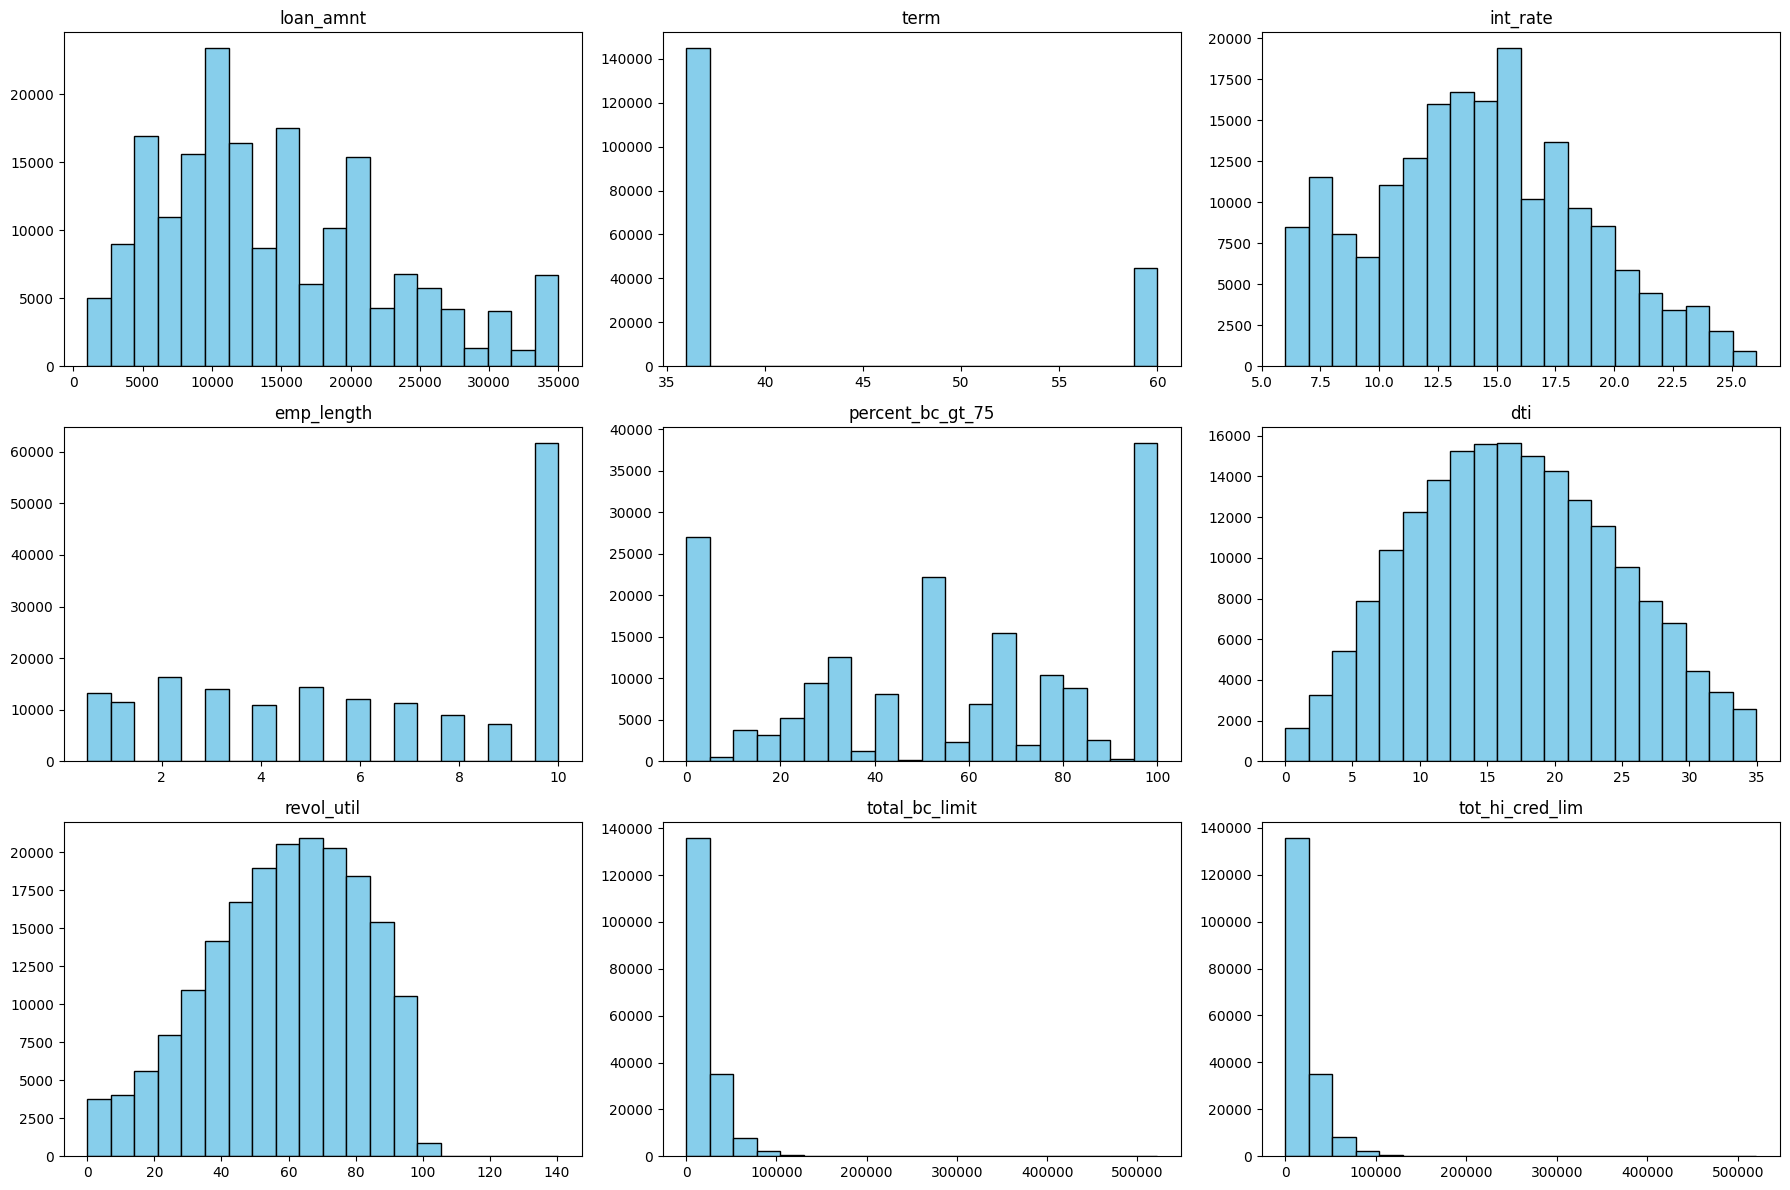

In [131]:
columns = ['loan_amnt', 'term', 'int_rate', 'emp_length', 'percent_bc_gt_75', 'dti', 'revol_util', 'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))  # 2x3 grid for the first six columns

for ax, col in zip(axes.flat, columns):
    if training_load[col].dtype in ['int64', 'float64']:  # Numerical columns
        ax.hist(training_load[col], bins=20, color='skyblue', edgecolor='black')
    else:
        training_load[col].value_counts().plot(kind='bar', ax=ax, color='lightgreen', edgecolor='black')
    ax.set_title(col)
plt.tight_layout()
